<center><h1><b>CNN - Cifar10 Image Classification</b></h1></center>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [3]:
# List of objects in keras datasets
dir(datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'california_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [4]:
# Loading of datasets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
# This is to idicate that y_trai is currently 2 dimesional data
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
# Converting y_train to 1 dimension
y_train = y_train.reshape(-1,)  # -1 is used in order not to chage the dimension 
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (6,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]]);

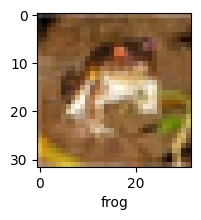

In [12]:
plot_sample(X_train, y_train, 0)

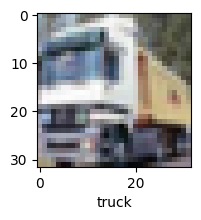

In [13]:
plot_sample(X_train, y_train, 1)

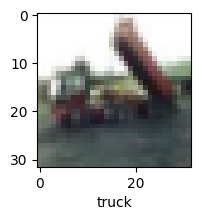

In [14]:
plot_sample(X_train, y_train, 2)

In [15]:
# Normaliztion of the dataset by dividing by 255. 255 is the highest value of an image pixel
X_train = X_train/255
X_test = X_test/255

### Artificial Neural Network Before Convolutional Neural Network

In [16]:
# Converting y_train to One Hot Encoding categorical data
y_train_categorical = keras.utils.to_categorical(
y_train, num_classes=10)

y_test_categorical = keras.utils.to_categorical(
y_test, num_classes=10)

In [17]:
ann = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),  # Define the input layer
    keras.layers.Flatten(),  # Flatten the input data
    keras.layers.Dense(3000, activation='relu'),  # Hidden layer
    keras.layers.Dense(1000, activation='relu'),  # Hidden layer
    keras.layers.Dense(10, activation='sigmoid')  # Output layer
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.3011 - loss: 1.9391
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4167 - loss: 1.6499
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4525 - loss: 1.5529
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.4758 - loss: 1.4951
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.4944 - loss: 1.4381


In [18]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification Report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.47      0.53      1000
           1       0.65      0.60      0.62      1000
           2       0.29      0.58      0.38      1000
           3       0.42      0.18      0.25      1000
           4       0.56      0.18      0.27      1000
           5       0.32      0.53      0.40      1000
           6       0.51      0.56      0.54      1000
           7       0.56      0.56      0.56      1000
           8       0.71      0.53      0.61      1000
           9       0.57      0.57      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.52      0.48      0.47     10000
weighted avg       0.52      0.48      0.47     10000



## Convolutional Neural Network

In [19]:
cnn = models.Sequential([
    # CNN layers   this cnn layer can be duplicated
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)), # This will detect the features in the images
    layers.MaxPooling2D((2,2)), # This will reduce the size of the image through resampling. AveragePooling can also be used
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'), # This will detect the features in the images
    layers.MaxPooling2D((2,2)), # This will reduce the size of the image through resampling. AveragePooling can also be used

    
    # Dense layers
    layers.Flatten(),  # Flatten the input data
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(10, activation='softmax')  # Output layer. This will normalize the probability
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.3501 - loss: 1.7765
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.5846 - loss: 1.1792
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6386 - loss: 1.0279
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6660 - loss: 0.9623
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6884 - loss: 0.8981
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7058 - loss: 0.8450
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7205 - loss: 0.8063
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7318 - loss: 0.7683
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7457 - loss: 0.7299
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7561 - loss: 0.6976


### CNN Model Evaluation

In [20]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6954 - loss: 0.9315


[0.9329433441162109, 0.692799985408783]

### CNN Model Prediction

In [21]:
y_pred1 = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [22]:
y_classes = [np.argmax(element) for element in y_pred1]

y_classes[:20]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 3, 8, 6]

In [23]:
y_test[:20]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1],
       [0],
       [9],
       [5],
       [7],
       [9],
       [8],
       [5],
       [7],
       [8],
       [6]], dtype=uint8)

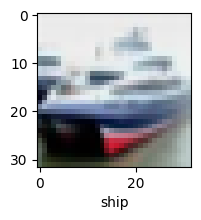

In [24]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 1)

In [25]:
classes[y_classes[1]]

'ship'

In [26]:
classes[y_classes[0]]

'cat'

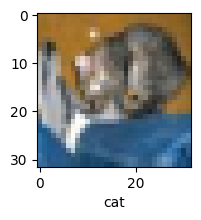

In [27]:
plot_sample(X_test, y_test, 0)

In [28]:
y_pred1 = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred1]
print('Classification Report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.80      0.83      0.82      1000
           2       0.62      0.53      0.57      1000
           3       0.53      0.48      0.50      1000
           4       0.68      0.62      0.65      1000
           5       0.61      0.55      0.58      1000
           6       0.65      0.87      0.74      1000
           7       0.82      0.69      0.75      1000
           8       0.74      0.86      0.79      1000
           9       0.76      0.78      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

